In [152]:
%matplotlib widget

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
data_json = pd.read_json('jsondata.json')

In [155]:
data_json.head()
# data_json.to_csv('data_file.csv',index=None)


,added,country,end_year,impact,insight,intensity,likelihood,pestle,published,region,relevance,sector,source,start_year,title,topic,url
0,"January, 20 2017 03:51:25",United States of America,,,Annual Energy Outlook,6,3,Industries,"January, 09 2017 00:00:00",Northern America,2,Energy,EIA,,U.S. natural gas consumption is expected to in...,gas,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
1,"January, 20 2017 03:51:24",United States of America,,,Annual Energy Outlook,6,3,Industries,"January, 09 2017 00:00:00",Northern America,2,Energy,EIA,,Reference case U.S. crude oil production is pr...,oil,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
2,"January, 20 2017 03:51:23",United States of America,,,Annual Energy Outlook,6,3,Industries,"January, 09 2017 00:00:00",Northern America,2,Energy,EIA,,U.S. petroleum consumption is projected to rem...,consumption,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
3,"January, 20 2017 03:26:40",Mexico,,,WRI Partnership Aims to Foster Supply Chain Tr...,6,2,Environmental,"January, 18 2017 00:00:00",Central America,3,Environment,sustainablebrands.com,,"Mars, Unilever, Cargill and Mondelēz are alrea...",oil,http://www.sustainablebrands.com/news_and_view...
4,"January, 19 2017 00:55:54",,,,N-Hexane Market Hit at a CAGR of 5% by 2024 - ...,6,3,Economic,"January, 18 2017 00:00:00",World,2,,SBWire,,Polymerization will remain top 3 end-users in ...,market,http://www.sbwire.com/press-releases/n-hexane-...


In [156]:
df = pd.read_csv('data_file.csv')

In [157]:
# df.head()

# Data Cleaning Part

In [158]:
int(df['end_year'].median())
df['end_year'].fillna(int(df['end_year'].median()),inplace=True)
df['end_year'] = df['end_year'].astype(int)


In [159]:
df['impact'].fillna(df['impact'].median(),inplace=True)

In [160]:
df['intensity'].fillna(df['intensity'].median(),inplace=True)

In [161]:
df['start_year'].fillna(int(df['start_year'].median()),inplace=True)
df['start_year'] = df['start_year'].astype(int)

In [162]:
df['likelihood'].fillna(df['likelihood'].median(),inplace=True)
df['relevance'].fillna(df['likelihood'].median(),inplace=True)

In [163]:
df.fillna('not_defined',inplace=True)

In [164]:
df.head(3)

,added,country,end_year,impact,insight,intensity,likelihood,pestle,published,region,relevance,sector,source,start_year,title,topic,url
0,"January, 20 2017 03:51:25",United States of America,2020,3.0,Annual Energy Outlook,6.0,3.0,Industries,"January, 09 2017 00:00:00",Northern America,2.0,Energy,EIA,2016,U.S. natural gas consumption is expected to in...,gas,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
1,"January, 20 2017 03:51:24",United States of America,2020,3.0,Annual Energy Outlook,6.0,3.0,Industries,"January, 09 2017 00:00:00",Northern America,2.0,Energy,EIA,2016,Reference case U.S. crude oil production is pr...,oil,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...
2,"January, 20 2017 03:51:23",United States of America,2020,3.0,Annual Energy Outlook,6.0,3.0,Industries,"January, 09 2017 00:00:00",Northern America,2.0,Energy,EIA,2016,U.S. petroleum consumption is projected to rem...,consumption,http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...


# Data Displaying Part
### like Available Country_names,Sectors,Region,etc
#### Better for the Viewing Grouped Data

In [165]:

list_region = df.drop_duplicates('region')
list_region = np.array(list_region['region'])
#--------------------
list_country = df.drop_duplicates('country')
list_country = np.array(list_country['country'])
#--------------------
list_sector = df.drop_duplicates('sector')
list_sector = np.array(list_sector['sector'])
#--------------------
list_pestle = df.drop_duplicates('pestle')
list_pestle = np.array(list_pestle['pestle'])
#--------------------
list_topic = df.drop_duplicates('topic')
list_topic = np.array(list_topic['topic'])


#### un-comment the below field when need list of Avialable  Values

In [166]:
# print("Avialable_Region-> {}\n -------------------------\n Avialable_Country-> {}\n ------------\n Avialable_Sector--> {} \n --------------\n Avialable_pestle--> {} \n ----------------\n Avialable_topics -> {} \n -------------".format(list_region,list_country,list_sector,list_pestle,list_topic))

# Grouping DataSet

In [167]:
df_pestle_sector = df.groupby(['pestle','sector'])

#### viewing the Grouped Dataset

In [168]:
df_pestle_sector.get_group(('Economic','Energy')).head(3)


,added,country,end_year,impact,insight,intensity,likelihood,pestle,published,region,relevance,sector,source,start_year,title,topic,url
5,"January, 19 2017 00:55:52",not_defined,2020,3.0,N-Hexane Market Hit at a CAGR of 5% by 2024 - ...,6.0,3.0,Economic,"January, 18 2017 00:00:00",World,2.0,Energy,SBWire,2016,High demand for n-Hexane in oil extraction owi...,oil,http://www.sbwire.com/press-releases/n-hexane-...
7,"January, 17 2017 04:19:59",not_defined,2018,3.0,Oil prices will be much more volatile in 2017,16.0,4.0,Economic,"January, 16 2017 00:00:00",World,4.0,Energy,TRAC News,2017,Global oil prices will witness much more volat...,oil,http://www.news.tracanada.ca/2017/01/16/oil-pr...
15,"January, 17 2017 00:55:16",not_defined,2020,3.0,"Cargill's quest for fish food grows, enriching...",16.0,4.0,Economic,"January, 14 2017 00:00:00",World,4.0,Energy,Star Tribune,2019,Industry demand for fish oil will bypass the w...,oil,http://www.startribune.com/cargill-s-quest-for...


In [169]:
df_topic = df.groupby('topic')
df_country = df.groupby('country')
df_sector = df.groupby('sector')
df_region = df.groupby('region')
df_pestle = df.groupby('pestle')

In [170]:
len(df_country.get_group('India'))

19

# Ipython used to display  Data As user Need

In [171]:
import ipywidgets as widgets
from IPython.display import clear_output,update_display

In [172]:
drd_country = widgets.Dropdown(
    options=list_country,
    value='India',
    description='Country:',
)
drd_region = widgets.Dropdown(
    options=list_region,
    value=list_region[0],
    description='Region:',
)
drd_sector = widgets.Dropdown(
    options=list_sector,
    value=list_sector[0],
    description='Sector:',
)
drd_pestle = widgets.Dropdown(
    options=list_pestle,
    value=list_pestle[0],
    description='Pestle:',
)
drd_topic = widgets.Dropdown(
    options=list_topic,
    value=list_topic[0],
    description='Topics:',
)
def on_country_change(change):
    display()
    if change['type'] == 'change' and change['name'] == 'value':

#         update_display(obj = df_country.get_group(change['new']),display_id= 'Country')
        display("Country changed to {}" .format(change['new']))

        display(df_country.get_group(change['new']))
#         display

        
def on_region_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
#         clear_output()
        display("Region changed to {}" .format(change['new']))
    
        display(df_region.get_group(change['new']))
        
def on_sector_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        display("Sector changed to {}" .format(change['new']))        
        display(df_sector.get_group(change['new']))
        
def on_pestle_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        display("Pestle changed to {}" .format(change['new'])) 
        display(df_pestle.get_group(change['new']))
         
        
def on_topic_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
#         clear_output()
        display("Topic changed to {}" .format(change['new']))
        display(df_topic.get_group(change['new']))
        
# drd_country.observe(on_country_change)
# drd_region.observe(on_region_change)
# drd_sector.observe(on_sector_change)
# drd_pestle.observe(on_pestle_change)
# drd_topic.observe(on_topic_change)

# display(drd_country,drd_region,drd_sector,drd_pestle,drd_topic)

## Get Group by Country

In [173]:
drd_country.observe(on_country_change)
display(drd_country)

Dropdown(description='Country:', index=10, options=('United States of America', 'Mexico', 'not_defined', 'Nige…

'Country changed to Mexico'

,added,country,end_year,impact,insight,intensity,likelihood,pestle,published,region,relevance,sector,source,start_year,title,topic,url
3,"January, 20 2017 03:26:40",Mexico,2020,3.0,WRI Partnership Aims to Foster Supply Chain Tr...,6.0,2.0,Environmental,"January, 18 2017 00:00:00",Central America,3.0,Environment,sustainablebrands.com,2016,"Mars, Unilever, Cargill and Mondelēz are alrea...",oil,http://www.sustainablebrands.com/news_and_view...
201,"December, 18 2016 07:05:16",Mexico,2020,3.0,Country Analysis Brief: Mexico,4.0,2.0,Environmental,"December, 09 2016 00:00:00",Central America,2.0,Energy,cpzulia,2016,Mexico's shale gas resources could support inc...,gas,http://www.cpzulia.org/ARCHIVOS/EIA_MEXICO_ANA...
853,"August, 01 2016 00:57:13",Mexico,2020,3.0,"""Weathered"" Gulf Oil May Threaten Development ...",4.0,2.0,Environmental,"July, 29 2016 00:00:00",Central America,2.0,Energy,IHS Engineering 360,2016,Ultraviolet light is changing the structure of...,oil,http://insights.globalspec.com/article/2980/we...


## Get Group by Region

In [174]:
drd_region.observe(on_region_change)

display(drd_region)

Dropdown(description='Region:', options=('Northern America', 'Central America', 'World', 'not_defined', 'Weste…

'Region changed to Southern Asia'

,added,country,end_year,impact,insight,intensity,likelihood,pestle,published,region,relevance,sector,source,start_year,title,topic,url
32,"January, 13 2017 03:59:31",India,2020,3.0,Global Growth Edges Up to 2.7 Percent Despite ...,16.0,4.0,Economic,"January, 10 2017 00:00:00",Southern Asia,4.0,not_defined,World Bank,2017,South Asia: Regional growth is expected to pic...,growth,http://www.worldbank.org/en/news/press-release...
88,"January, 08 2017 05:29:33",Iran,2020,3.0,Oil Production Cuts to Begin in January 2017 -...,8.0,4.0,Industries,"November, 30 2016 00:00:00",Southern Asia,2.0,Energy,Sputnik News,2016,"Iran will increase it oil production by 90,000...",oil,https://sputniknews.com/business/2016113010480...
89,"January, 08 2017 05:29:33",Iran,2020,3.0,Oil Production Cuts to Begin in January 2017 -...,9.0,3.0,Industries,"November, 30 2016 00:00:00",Southern Asia,3.0,Energy,Sputnik News,2016,Iran is the only OPEC member that will boost i...,oil,https://sputniknews.com/business/2016113010480...
134,"January, 04 2017 00:45:18",Iran,2020,3.0,2017: A Saudi existential crisis,16.0,4.0,Political,"January, 03 2017 00:00:00",Southern Asia,4.0,not_defined,Middle East Eye,2017,"For Saudi Arabia, 2017 will be defined by an e...",crisis,http://www.middleeasteye.net/columns/2017-saud...
211,"December, 18 2016 04:02:25",India,2017,3.0,Monetary Policy Report - January 2016,16.0,4.0,Economic,"January, 19 2016 00:00:00",Southern Asia,4.0,not_defined,bankofcanada,2016,GDP growth in India will likely remain in the ...,growth,http://www.bankofcanada.ca/wp-content/uploads/...
217,"December, 18 2016 03:21:55",Iran,2020,3.0,European Economic Forecast - Winter 2016,6.0,3.0,Political,"January, 27 2016 00:00:00",Southern Asia,2.0,Retail,Europa,2016,The repeal of international sanctions on Iran ...,export,http://ec.europa.eu/economy_finance/publicatio...
273,"December, 05 2016 01:26:55",India,2018,3.0,A temporary reprieve for OPEC,16.0,4.0,Economic,"December, 02 2016 00:00:00",Southern Asia,4.0,Financial services,EIU,2017,Buoyant economic growth and investment will co...,economic growth,http://country.eiu.com/article.aspx?articleid=...
275,"December, 04 2016 03:00:18",Iran,2020,3.0,Sanction removal unveils Iran currency hopes,72.0,4.0,Economic,"January, 28 2016 00:00:00",Southern Asia,6.0,Financial services,Euromoney,2016,Renaissance Capital forecasts a total $54 bill...,export,http://www.euromoney.com/Article/3524755/Sanct...
306,"November, 27 2016 07:01:47",Iran,2020,3.0,Palm oil/Vegoils: Market factors to watch Mond...,4.0,2.0,Industries,"November, 07 2016 00:00:00",Southern Asia,2.0,Energy,the star online,2016,Saudis could raise oil output again as sparrin...,oil,http://www.thestar.com.my/business/business-ne...
308,"November, 27 2016 06:29:20",India,2020,3.0,18th November 2016 Current Affairs Analysis - ...,12.0,4.0,not_defined,"November, 18 2016 00:00:00",Southern Asia,3.0,not_defined,IASTOPPERS,2016,India imported 2 million barrels of Iran and i...,not_defined,http://www.iastoppers.com/18th-november-2016-c...


## Get Group by Pestle

In [175]:
drd_pestle.observe(on_pestle_change)

display(drd_pestle)

Dropdown(description='Pestle:', options=('Industries', 'Environmental', 'Economic', 'Political', 'Technologica…

## Get Group by Sector

In [176]:
drd_sector.observe(on_sector_change)

display(drd_sector)

Dropdown(description='Sector:', options=('Energy', 'Environment', 'not_defined', 'Government', 'Aerospace & de…

## Get Group by Topics

In [177]:
drd_topic.observe(on_topic_change)

display(drd_topic)

Dropdown(description='Topics:', options=('gas', 'oil', 'consumption', 'market', 'gdp', 'war', 'production', 'e…

# All In One [Automatically slice DataFrame as user need]

## Select DataFrame using DropDown Widgets
### Plot By clicking A Button
#### (Perfect_List)

In [178]:
region_selected=country_selected=pestle_selected=None

df_select = pd.DataFrame()
region_drd = widgets.Dropdown(
options = list_region,
value = list_region[0],
description="Region"
)


"""
#uncomment when Need to by Country Not by region
country_label = widgets.Label(value = "Available Country")
country_drd = widgets.Dropdown(
    options = list_country,
    value = list_country[0],
    description="Country"
    )
display(country_label,country_drd)
country_drd.observe(get_selected_c_data)
"""
def display_data_set(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['new'] != 'Not_Selected':
        topic = change['new']
        global df_select
        df_select = df_select.loc[(df_select['topic'] == topic)]
        display(df_select)
    

def get_selected_r_data():
    global region_selected 
    region_selected = region_drd.value
    if region_selected != 'Not_Selected':
        global df_select
        df_select = df.loc[(df['region'] == region_selected)]
        df_select = df_select[['start_year','end_year','pestle','sector','topic','country']]

        avail_country = df_select.drop_duplicates('country')
        country_label = widgets.Label(value="Available Country")

        avail_country = np.array(avail_country['country'])
        avail_country = np.insert(avail_country,0,'Not_Selected')
        country_drd = widgets.Dropdown(
            options = avail_country,
            value = avail_country[0],
            description="Country"
            )
        display(country_label,country_drd)
        country_drd.observe(get_selected_c_data)


    
def get_selected_c_data(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['new'] != 'Not_Selected':
    
        global country_selected 
        country_selected = change['new']
        get_country_data(country_selected)

def get_selected_p_data(change):
    global pestle_selected
    if change['type'] == 'change' and change['name'] == 'value' and change['new'] !='Not_Selected':
        pestle_selected = change['new']
        select_by_country(country_selected,pestle_selected)

def show_pestle_field(values):


#     display(value)
    values = np.insert(values,0,'Not_Selected')
    pestle_label = widgets.Label(value="Available Pestle")
    pestle_drd = widgets.Dropdown(
        options = values,
        value =values[0] ,
        description=" Pestle"
        )
    display(pestle_label,pestle_drd)
    pestle_drd.observe(get_selected_p_data)


    

    

def get_country_data(country_value):
    global df_select
    df_select = df.loc[(df['country'] == country_value)]
    df_select = df_select[['start_year','end_year','pestle','sector','topic','country']]
    avail_pestle = df_select.drop_duplicates('pestle')
    avail_pestle = np.array(avail_pestle['pestle'])
       
    show_pestle_field(avail_pestle)
    

    

    
def select_by_country(country_val,pestle_val):

    global df_select
    df_select = df.loc[(df['country'] == country_val) & (df['pestle'] == pestle_val)]
    df_select = df_select[['start_year','end_year','pestle','sector','topic','country']]




    avail_sector = df_select.drop_duplicates('sector')

    avail_sector = np.array(avail_sector['sector'])
    avail_sector = np.insert(avail_sector,0,'Not_Selected')
    sector_label = widgets.Label(value="Available Sector")
    sector_drd = widgets.Dropdown(
        options = avail_sector,
        value = avail_sector[0],
        description=" sector"
        )
    display(sector_label,sector_drd)
    sector_drd.observe(get_topic_list)


def get_topic_list(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['new'] != 'Not_Selected':
        sector_val = change['new']
        global df_select
        df_select = df_select.loc[(df['sector'] == sector_val)]
        df_select = df_select[['start_year','end_year','pestle','sector','topic','country']]
        avail_topic = df_select.drop_duplicates('topic')
        avail_topic = np.array(avail_topic['topic'])
        avail_topic = np.insert(avail_topic,0,'Not_Selected')
        

        topic_label = widgets.Label(value="Available Topic")
        topic_drd = widgets.Dropdown(
            options = avail_topic,
            value = avail_topic[0],
            description=" topic"
            )

        display(topic_label,topic_drd)
        topic_drd.observe(display_data_set)

    
region_drd = widgets.Dropdown(
    options = list_region,
    value = list_region[0],
    description="Region"
    )


### Select What You Need to See or Select What to Display[Main part of This Notebook]

In [179]:

region_label = widgets.Label(value="Available Region")

display(region_label,region_drd)

region_drd.on_trait_change(get_selected_r_data,name="value")


Label(value='Available Region')

Dropdown(description='Region', options=('Northern America', 'Central America', 'World', 'not_defined', 'Wester…

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
  


Label(value='Available Country')

Dropdown(description='Country', options=('Not_Selected', 'India', 'Iran', 'not_defined', 'Pakistan'), value='N…

Label(value='Available Pestle')

Dropdown(description=' Pestle', options=('Not_Selected', 'Economic', 'Industries', 'not_defined', 'Political',…

Label(value='Available Sector')

Dropdown(description=' sector', options=('Not_Selected', 'not_defined', 'Financial services', 'Construction', …

Label(value='Available Topic')

Dropdown(description=' topic', options=('Not_Selected', 'economic growth'), value='Not_Selected')

,start_year,end_year,pestle,sector,topic,country
273,2017,2018,Economic,Financial services,economic growth,India


# Data  Visualization Part

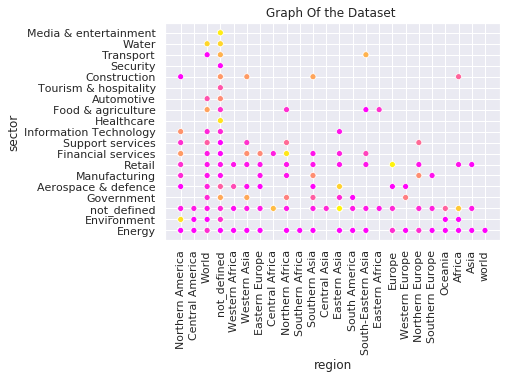

In [242]:
import matplotlib.pyplot as plt


%matplotlib inline
import seaborn as sns

def plot_show(x='region',y='sector',hue='topic'):
    
    plt.xticks(rotation=90)
    g = sns.scatterplot(x=x,y=y,data=df,hue=hue,legend=False,palette='spring')
    # g = set_xticklabels(rotation=90)
    plt.title("Graph Of the Dataset ")

    # g.despine(left=True)
    # plt.legend(loc='upper left')

    plt.show()
plot_show()

# This dataset is not Enough for Big Visualization
## So this Ends Here